In [46]:
'''
No hicimos la tarea :(
'''
#Bibliotecas
import numpy as np
from matplotlib import pyplot as plt
#Covarianzas
from scipy.stats import pearsonr as r

#Hilbert
from scipy.fftpack import hilbert

(30000, 2)


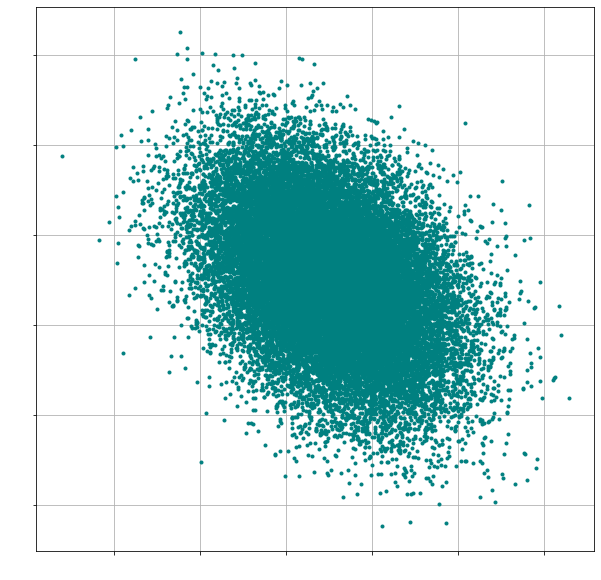

In [17]:
L = 4
sr = 200
t = np.linspace(0,L,sr*L)

M = np.array( [-1, 1] )
S = np.array( [ [2,-.8], 
                [-.8,2] ] )

X = np.random.multivariate_normal(M,S,30000)
print(X.shape)

plt.figure(figsize=(10,10))
plt.plot( X[:,0], X[:,1], '.', color='teal' )
plt.xticks(color='w', size=15)
plt.yticks(color='w', size=15)
plt.grid()
plt.show()

In [39]:
r( X[:,0], X[:,1] )

(-0.39842935744289465, 0.0)

In [21]:
np.cov( X[:,0], X[:,1] )

array([[ 1.99651516, -0.79818008],
       [-0.79818008,  2.0101409 ]])

In [23]:
S = np.cov( X[:,0], X[:,1] )

S[0,1]/np.product( np.sqrt( S.diagonal() ) )

-0.3984293574428946

In [24]:
def abre(path, file_name):
    data = np.loadtxt(path+file_name, delimiter='\t', dtype='str')
    data = data[:-1,:-1].T.astype('float') #Elimina la última fila y columna que no contienen nada
    
    return data

path = '/home/edu/Documentos/GitHub/MCIB-19-P-Edu/data/P1/' #Cambiar dependiendo de la compu
file = 'Apnea1.txt'


signals = abre(path,file)


PL = signals[0]
EKG = signals[1]
OX = signals[2]
EMG = signals[3]


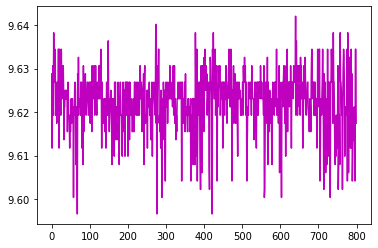

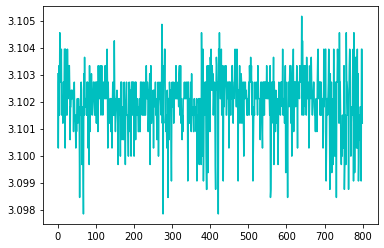

In [45]:
plt.figure('potencia')
plt.plot( PL[:800]**2, 'm' )

plt.figure('original')
plt.plot( PL[:800], 'c' )

In [41]:
S = np.cov( EMG[:800], EKG[:800] )
print('Cov = ',S)

R = r( OX[:800], EKG[:800] )
print('\nr = ', R)

S[0,1]/np.product( np.sqrt( S.diagonal() ) )

Cov =  [[1.52120815e-04 1.05543717e-03]
 [1.05543717e-03 2.79175252e+00]]

r =  (0.05808896118062863, 0.10062701973577627)


0.051215285983564965

[]

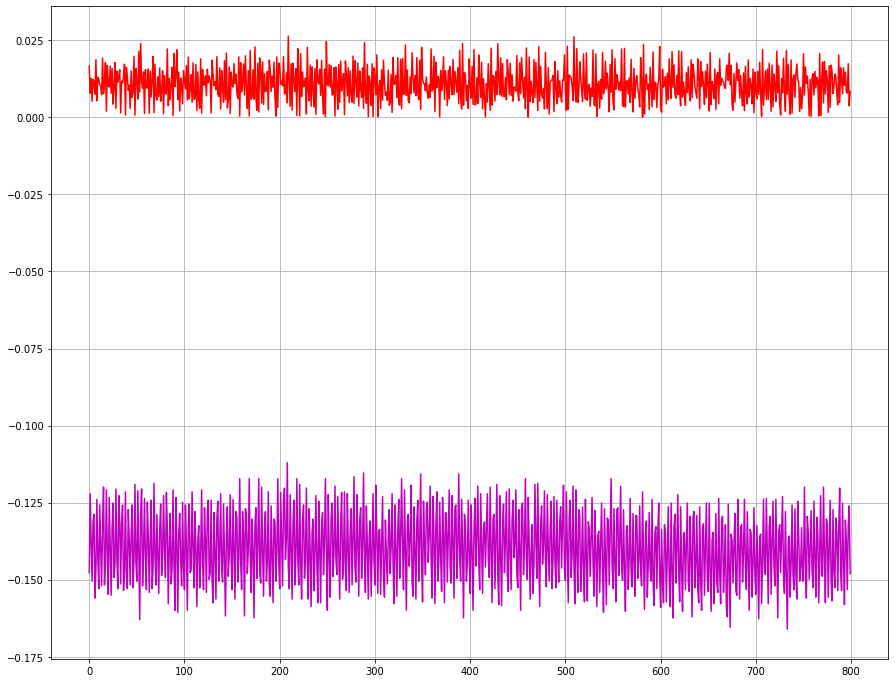

In [51]:
env = hilbert(EMG[:800])

plt.figure( figsize=(15,12) )
plt.plot(np.abs(env), 'r')
plt.plot(EMG[:800], 'm')
plt.grid()
plt.plot()